### coregenome functional comparison of 3 pangenome studies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database")

In [2]:
# load geneMatrix
lg_geneMatrix=pd.read_csv(r"data\geneMatrix\lgpan_geneMatrix.csv",index_col=0)
na_geneMatrix=pd.read_csv(r"data\geneMatrix\nature1011_geneMatrix.csv",index_col=0)
this_geneMatrix=pd.read_csv(r"data\geneMatrix\pan1800_v2_blastp_50_70_geneMatrix.csv",index_col=0)

na_coregeneList=na_geneMatrix[na_geneMatrix.sum(axis=1)==1011].index.tolist()
lg_coregeneList=lg_geneMatrix[lg_geneMatrix.sum(axis=1)>1360*0.99].index.tolist()
this_coregeneList=this_geneMatrix[this_geneMatrix.sum(axis=1)>1807*0.99].index.tolist()


In [3]:
# load pan-genome function annotation file,
na1011_function = pd.read_excel(r"data/genome/pan1011_v1_functional_annotations.xlsx",header=2)
lgpan_function = pd.read_excel(r"data/genome/lg1392_functional_annotations.xlsx",header=2)
this1800_function = pd.read_excel(r"data\genome\pan1800_v2_functional_annotations.xlsx",header=2)

lgcore_function=lgpan_function[lgpan_function['query'].isin(lg_coregeneList)]
nacore_function=na1011_function[na1011_function['query'].isin(na_coregeneList)]
thiscore_function=this1800_function[this1800_function['query'].isin(this_coregeneList)]

In [6]:
def get_cog_counts(df_annotation,df_cog):
    '''get COG number counts'''
    df_annotation = df_annotation.dropna(subset=["COG_category"])
    cog_list = df_cog.index.tolist()
    cog_counts=pd.Series(index=cog_list)
    for i in cog_list:
        count = len(df_annotation[df_annotation["COG_category"].str.contains(i)])
        cog_counts[i] = count
    return cog_counts

# load COG category,set columns as "COG","category"
df_cog=pd.read_csv("data/cog_cotegory",index_col=0,sep="\t",header=None)
df_cog.columns=["color","description"]
# color列每个元素前加上‘#’
df_cog["color"]='#'+df_cog["color"].astype(str)

# get COG counts of each core genome
lgcore_cog_counts=get_cog_counts(lgcore_function,df_cog)
nacore_cog_counts=get_cog_counts(nacore_function,df_cog)
thiscore_cog_counts=get_cog_counts(thiscore_function,df_cog)

df_cog_counts=pd.DataFrame(columns=["lg1362_coregenome","this1800_coregenome","na1011_coregenome"])
df_cog_counts["lg1362_coregenome"]=lgcore_cog_counts
df_cog_counts["na1011_coregenome"]=nacore_cog_counts
df_cog_counts["this1800_coregenome"]=thiscore_cog_counts
df_cog_counts=df_cog_counts[(df_cog_counts>10).any(axis=1)]
df_cog_counts=df_cog_counts.astype(int)
cog_list=df_cog_counts.index.tolist()
# set column order as na1011_coregenome,lg1362_coregenome,this1800_coregenome
df_cog_counts=df_cog_counts[["na1011_coregenome","lg1362_coregenome","this1800_coregenome"]]
df_cog_counts

# save results
df_cog_counts.to_csv(r"code/4.pan-genome_analysis/coregenome_comparison/output/3coregenome_compare_cog_counts.csv")

C:\Users\wangh\AppData\Local\Temp\ipykernel_24300\520673043.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)
C:\Users\wangh\AppData\Local\Temp\ipykernel_24300\520673043.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)
C:\Users\wangh\AppData\Local\Temp\ipykernel_24300\520673043.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cog_counts=pd.Series(index=cog_list)


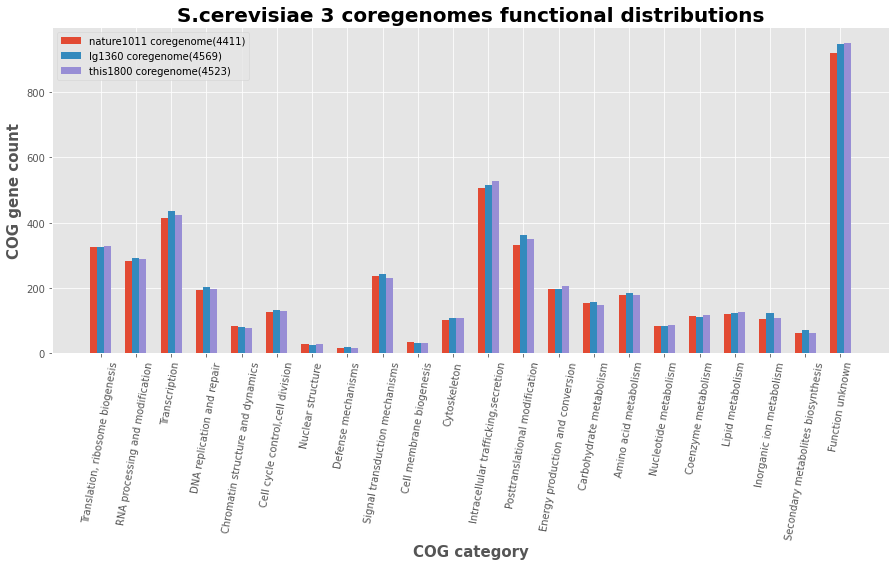

In [5]:
# plot grouped barplot to compare COG gene count in each COG category for 3 pangenome
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
bar_width = 0.2
index = np.arange(len(cog_list))
plt.bar(index , df_cog_counts['na1011_coregenome'], bar_width, label='nature1011 coregenome(%s)'%len(nacore_function))
plt.bar(index+bar_width, df_cog_counts['lg1362_coregenome'], bar_width, label='lg1360 coregenome(%s)'%len(lgcore_function))
plt.bar(index +bar_width*2 , df_cog_counts['this1800_coregenome'], bar_width, label='this1800 coregenome(%s)'%len(thiscore_function))
plt.xlabel('COG category',fontsize=15,fontweight='bold')
plt.ylabel('COG gene count',fontsize=15,fontweight='bold')
plt.title('S.cerevisiae 3 coregenomes functional distributions',fontsize=20,fontweight='bold')
cog_description=df_cog[df_cog.index.isin(cog_list)]["description"].tolist()
plt.xticks(index+bar_width, cog_description,rotation=80,fontsize=10)
plt.legend()
plt.show()

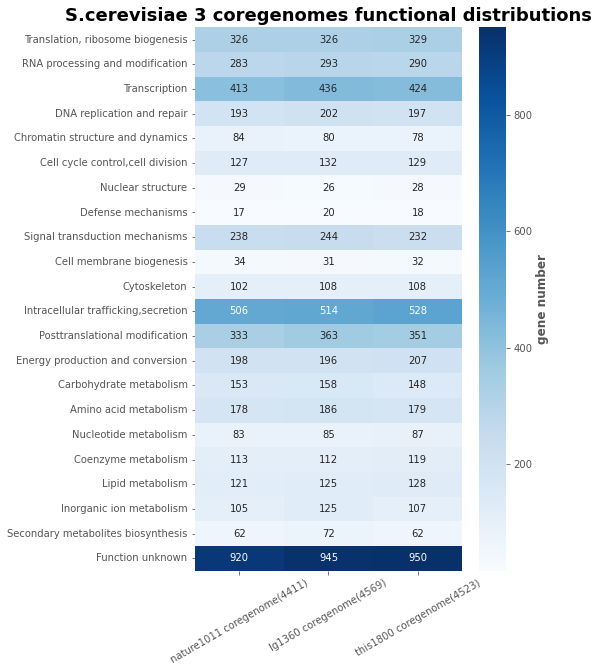

In [8]:
# plot heatmap to compare COG gene count in each COG category for 3 pangenome
plt.figure(figsize=(6,10))
plt.style.use('ggplot')
plt.title('S.cerevisiae 3 coregenomes functional distributions',fontsize=18,fontweight='bold')
sns.heatmap(df_cog_counts,annot=True,fmt="d",cmap="Blues")
# set colorbar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('gene number',fontsize=12,fontweight='bold')
# rest xticklabels
xlabels = ['nature1011 coregenome(%s)'%len(nacore_function),'lg1360 coregenome(%s)'%len(lgcore_function),'this1800 coregenome(%s)'%len(thiscore_function)]
plt.xticks(np.arange(0, 3, 1)+0.5,labels=xlabels,fontsize=10,rotation=30)
# reset yticklabels
plt.yticks(np.arange(0, len(cog_list), 1)+0.5, cog_description,fontsize=10,rotation=0)
plt.show()
